# Gaussian Data Analysis

This notebook is analyzing the Gaussian simulation study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
number_iterations = 1500

load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Data_processed\Gauss_Processed_data.pkl"

#loading the data
# df = pd.read_csv(load_path) # takes way longer and loads from csv source
df = pd.read_pickle(load_path)

df = df.drop(["time", "MMD"], axis=1)

In [3]:
df.shape[0] # the expected number of rows is 27000*1500 = 40500000, the simulation worked now


40500000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40500000 entries, 0 to 224999
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mu_hat         float64
 1   sigma_hat      float64
 2   mu_hat_MLE     float64
 3   sigma_hat_MLE  float64
 4   mu             int32  
 5   sigma          int32  
 6   xsize          int32  
 7   ysize          int32  
 8   b              object 
 9   ID             int32  
dtypes: float64(4), int32(5), object(1)
memory usage: 2.6+ GB


# Notes

* For big sigma convergence is might not be achieved in 1500 iterations for all b. When b is selected intelligently or sigma small no issue.
* b is important
* bigger sigma needs more iteration => clear but important result
* sample size doesn't seem to be very important

# Full Aggregation

In [5]:
def last_150_rows(group):
    return group.tail(150)

full_group_by = ["mu", "sigma", "b", "xsize", "ysize", "ID"]

df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)

df_last_150

C:\Users\nickk\AppData\Local\Temp\ipykernel_19056\2439513004.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)


,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID
0,-2.663525,1.779942,-2.735997,1.819368,-3,2,50,50,b0.01,1
1,-2.658452,1.790461,-2.735997,1.819368,-3,2,50,50,b0.01,1
2,-2.658108,1.810872,-2.735997,1.819368,-3,2,50,50,b0.01,1
3,-2.658157,1.834405,-2.735997,1.819368,-3,2,50,50,b0.01,1
4,-2.657728,1.865246,-2.735997,1.819368,-3,2,50,50,b0.01,1
...,...,...,...,...,...,...,...,...,...,...
4049995,48.140717,38.164795,47.928772,38.732870,50,40,1000,1000,bAUTO,150
4049996,48.138710,38.165480,47.928772,38.732870,50,40,1000,1000,bAUTO,150
4049997,48.137050,38.166780,47.928772,38.732870,50,40,1000,1000,bAUTO,150
4049998,48.136300,38.168580,47.928772,38.732870,50,40,1000,1000,bAUTO,150


In [6]:
df_last_150_aggregated = df_last_150.groupby(full_group_by).agg(["count", 'mean', "std"])
df_last_150_aggregated

mu_hat                      sigma_hat  \
                                 count       mean       std     count   
mu  sigma b     xsize ysize ID                                          
-3  2     b0.01 50    50    1      150  -2.727881  0.076614       150   
                            2      150  -3.111784  0.129122       150   
                            3      150  -2.720032  0.095749       150   
                            4      150  -3.297921  0.101446       150   
                            5      150  -3.038660  0.090056       150   
...                                ...        ...       ...       ...   
 50 40    bAUTO 1000  1000  146    150  49.411338  0.080134       150   
                            147    150  48.987569  0.102744       150   
                            148    150  49.123753  0.119800       150   
                            149    150  50.128883  0.092990       150   
                            150    150  48.058277  0.060726       150   

                                                     mu_hat_MLE             \
                                      mean       std      count       mean   
mu  sigma b     xsize ysize ID                                               
-3  2     b0.01 50    50    1     1.836742  0.138445        150  -2.735997   
                            2     1.980446  0.107567        150  -3.078314   
                            3     1.901777  0.105188        150  -2.748321   
                            4     1.537737  0.107025        150  -3.281941   
                            5     1.959953  0.185349        150  -3.001362   
...                                    ...       ...        ...        ...   
 50 40    bAUTO 1000  1000  146  39.592582  0.029520        150  49.943375   
                            147  40.191647  0.048134        150  49.343200   
                            148  41.582529  0.014275        150  49.477093   
                            149  39.123978  0.024637        150  49.844140   
                            150  38.219685  0.036714        150  47.928772   

                                     sigma_hat_MLE                  
                                 std         count       mean  std  
mu  sigma b     xsize ysize ID                                      
-3  2     b0.01 50    50    1    0.0           150   1.819368  0.0  
                            2    0.0           150   1.948005  0.0  
                            3    0.0           150   1.881310  0.0  
                            4    0.0           150   1.577719  0.0  
                            5    0.0           150   1.997410  0.0  
...                              ...           ...        ...  ...  
 50 40    bAUTO 1000  1000  146  0.0           150  39.196507  0.0  
                            147  0.0           150  40.433594  0.0  
                            148  0.0           150  41.056114  0.0  
                            149  0.0           150  40.019485  0.0  
                            150  0.0           150  38.732870  0.0  

[27000 rows x 12 columns]

# correct aggregation


In [7]:
df_last_150_sanity = df_last_150.groupby(full_group_by).agg(['mean'])
df_last_150_sanity_index_reset = df_last_150_sanity.reset_index()
df_last_150_sanity_index_reset

,mu,sigma,b,xsize,ysize,ID,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE
,,,,,,,mean,mean,mean,mean
0,-3,2,b0.01,50,50,1,-2.727881,1.836742,-2.735997,1.819368
1,-3,2,b0.01,50,50,2,-3.111784,1.980446,-3.078314,1.948005
2,-3,2,b0.01,50,50,3,-2.720032,1.901777,-2.748321,1.881310
3,-3,2,b0.01,50,50,4,-3.297921,1.537737,-3.281941,1.577719
4,-3,2,b0.01,50,50,5,-3.038660,1.959953,-3.001362,1.997410
...,...,...,...,...,...,...,...,...,...,...
26995,50,40,bAUTO,1000,1000,146,49.411338,39.592582,49.943375,39.196507
26996,50,40,bAUTO,1000,1000,147,48.987569,40.191647,49.343200,40.433594
26997,50,40,bAUTO,1000,1000,148,49.123753,41.582529,49.477093,41.056114


In [8]:
df_last_150_proper_aggregation = df_last_150_sanity.reset_index().drop(["ID"], axis=1).groupby(["mu", "sigma", "b", "xsize", "ysize"]).agg(["count","mean", "std"])
df_last_150_proper_aggregation

C:\Users\nickk\AppData\Local\Temp\ipykernel_19056\1691247118.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_last_150_proper_aggregation = df_last_150_sanity.reset_index().drop(["ID"], axis=1).groupby(["mu", "sigma", "b", "xsize", "ysize"]).agg(["count","mean", "std"])


mu_hat                      sigma_hat             \
                              mean                           mean              
                             count       mean       std     count       mean   
mu  sigma b     xsize ysize                                                    
-3  2     b0.01 50    50       150  -2.968290  0.255838       150   1.995193   
                100   50       150  -2.978076  0.284440       150   1.961372   
                      100      150  -2.942386  0.206453       150   2.008549   
                200   50       150  -2.988540  0.301178       150   1.978943   
                      100      150  -3.013903  0.219641       150   1.989079   
...                            ...        ...       ...       ...        ...   
 50 40    bAUTO 1000  50       150  49.971696  6.514999       150  39.614272   
                      100      150  49.485513  4.627070       150  39.678048   
                      200      150  49.236165  3.195673       150  39.877848   
                      500      150  49.308066  1.860968       150  40.050973   
                      1000     150  49.479948  1.394502       150  40.070691   

                                      mu_hat_MLE                       \
                                            mean                        
                                  std      count       mean       std   
mu  sigma b     xsize ysize                                             
-3  2     b0.01 50    50     0.216494        150  -2.972657  0.256814   
                100   50     0.188972        150  -2.978036  0.283983   
                      100    0.139345        150  -2.940310  0.205771   
                200   50     0.207389        150  -2.987249  0.301001   
                      100    0.135206        150  -3.013172  0.220447   
...                               ...        ...        ...       ...   
 50 40    bAUTO 1000  50     4.936757        150  50.499486  6.217630   
                      100    3.105457        150  49.944500  4.329782   
                      200    2.513178        150  49.869723  2.917682   
                      500    1.536391        150  49.717181  1.690400   
                      1000   1.045481        150  49.871051  1.218035   

                            sigma_hat_MLE                       
                                     mean                       
                                    count       mean       std  
mu  sigma b     xsize ysize                                     
-3  2     b0.01 50    50              150   1.990064  0.208865  
                100   50              150   1.957276  0.186262  
                      100             150   2.009863  0.136997  
                200   50              150   1.977094  0.204914  
                      100             150   1.988015  0.133412  
...                                   ...        ...       ...  
 50 40    bAUTO 1000  50              150  39.705934  3.950749  
                      100             150  39.643897  2.625836  
                      200             150  39.706229  2.087946  
                      500             150  39.981556  1.248070  
                      1000            150  39.956179  0.859502  

[180 rows x 12 columns]

In [9]:
df_last_150_proper_aggregation.columns = df_last_150_proper_aggregation.columns.droplevel(level=1)
df_last_150_proper_aggregation

mu_hat                      sigma_hat             \
                             count       mean       std     count       mean   
mu  sigma b     xsize ysize                                                    
-3  2     b0.01 50    50       150  -2.968290  0.255838       150   1.995193   
                100   50       150  -2.978076  0.284440       150   1.961372   
                      100      150  -2.942386  0.206453       150   2.008549   
                200   50       150  -2.988540  0.301178       150   1.978943   
                      100      150  -3.013903  0.219641       150   1.989079   
...                            ...        ...       ...       ...        ...   
 50 40    bAUTO 1000  50       150  49.971696  6.514999       150  39.614272   
                      100      150  49.485513  4.627070       150  39.678048   
                      200      150  49.236165  3.195673       150  39.877848   
                      500      150  49.308066  1.860968       150  40.050973   
                      1000     150  49.479948  1.394502       150  40.070691   

                                      mu_hat_MLE                       \
                                  std      count       mean       std   
mu  sigma b     xsize ysize                                             
-3  2     b0.01 50    50     0.216494        150  -2.972657  0.256814   
                100   50     0.188972        150  -2.978036  0.283983   
                      100    0.139345        150  -2.940310  0.205771   
                200   50     0.207389        150  -2.987249  0.301001   
                      100    0.135206        150  -3.013172  0.220447   
...                               ...        ...        ...       ...   
 50 40    bAUTO 1000  50     4.936757        150  50.499486  6.217630   
                      100    3.105457        150  49.944500  4.329782   
                      200    2.513178        150  49.869723  2.917682   
                      500    1.536391        150  49.717181  1.690400   
                      1000   1.045481        150  49.871051  1.218035   

                            sigma_hat_MLE                       
                                    count       mean       std  
mu  sigma b     xsize ysize                                     
-3  2     b0.01 50    50              150   1.990064  0.208865  
                100   50              150   1.957276  0.186262  
                      100             150   2.009863  0.136997  
                200   50              150   1.977094  0.204914  
                      100             150   1.988015  0.133412  
...                                   ...        ...       ...  
 50 40    bAUTO 1000  50              150  39.705934  3.950749  
                      100             150  39.643897  2.625836  
                      200             150  39.706229  2.087946  
                      500             150  39.981556  1.248070  
                      1000            150  39.956179  0.859502  

[180 rows x 12 columns]

In [10]:
df_last_150_proper_aggregation_index_reset = df_last_150_proper_aggregation.reset_index()
df_last_150_proper_aggregation_index_reset

mu sigma      b xsize ysize mu_hat                      sigma_hat  \
                                  count       mean       std     count   
0    -3     2  b0.01    50    50    150  -2.968290  0.255838       150   
1    -3     2  b0.01   100    50    150  -2.978076  0.284440       150   
2    -3     2  b0.01   100   100    150  -2.942386  0.206453       150   
3    -3     2  b0.01   200    50    150  -2.988540  0.301178       150   
4    -3     2  b0.01   200   100    150  -3.013903  0.219641       150   
..   ..   ...    ...   ...   ...    ...        ...       ...       ...   
175  50    40  bAUTO  1000    50    150  49.971696  6.514999       150   
176  50    40  bAUTO  1000   100    150  49.485513  4.627070       150   
177  50    40  bAUTO  1000   200    150  49.236165  3.195673       150   
178  50    40  bAUTO  1000   500    150  49.308066  1.860968       150   
179  50    40  bAUTO  1000  1000    150  49.479948  1.394502       150   

                         mu_hat_MLE                      sigma_hat_MLE  \
          mean       std      count       mean       std         count   
0     1.995193  0.216494        150  -2.972657  0.256814           150   
1     1.961372  0.188972        150  -2.978036  0.283983           150   
2     2.008549  0.139345        150  -2.940310  0.205771           150   
3     1.978943  0.207389        150  -2.987249  0.301001           150   
4     1.989079  0.135206        150  -3.013172  0.220447           150   
..         ...       ...        ...        ...       ...           ...   
175  39.614272  4.936757        150  50.499486  6.217630           150   
176  39.678048  3.105457        150  49.944500  4.329782           150   
177  39.877848  2.513178        150  49.869723  2.917682           150   
178  40.050973  1.536391        150  49.717181  1.690400           150   
179  40.070691  1.045481        150  49.871051  1.218035           150   

                          
          mean       std  
0     1.990064  0.208865  
1     1.957276  0.186262  
2     2.009863  0.136997  
3     1.977094  0.204914  
4     1.988015  0.133412  
..         ...       ...  
175  39.705934  3.950749  
176  39.643897  2.625836  
177  39.706229  2.087946  
178  39.981556  1.248070  
179  39.956179  0.859502  

[180 rows x 17 columns]

In [11]:
df_last_150_proper_aggregation_index_reset.columns

MultiIndex([(           'mu',      ''),
            (        'sigma',      ''),
            (            'b',      ''),
            (        'xsize',      ''),
            (        'ysize',      ''),
            (       'mu_hat', 'count'),
            (       'mu_hat',  'mean'),
            (       'mu_hat',   'std'),
            (    'sigma_hat', 'count'),
            (    'sigma_hat',  'mean'),
            (    'sigma_hat',   'std'),
            (   'mu_hat_MLE', 'count'),
            (   'mu_hat_MLE',  'mean'),
            (   'mu_hat_MLE',   'std'),
            ('sigma_hat_MLE', 'count'),
            ('sigma_hat_MLE',  'mean'),
            ('sigma_hat_MLE',   'std')],
           )

In [12]:
index = pd.MultiIndex.from_tuples([
    ('mu', ''), ('sigma', ''), ('b', ''), ('simulation sample size', ''), ('target sample size', ''),
    ('mu_hat', 'count'), ('mu_hat', 'mean'), ('mu_hat', 'std'),
    ('sigma_hat', 'count'), ('sigma_hat', 'mean'), ('sigma_hat', 'std'),
    ('mu_hat_MLE', 'count'), ('mu_hat_MLE', 'mean'), ('mu_hat_MLE', 'std'),
    ('sigma_hat_MLE', 'count'), ('sigma_hat_MLE', 'mean'), ('sigma_hat_MLE', 'std')
])

In [13]:
df_last_150_proper_aggregation_index_reset.columns = index
df_last_150_proper_aggregation_index_reset

mu sigma      b simulation sample size target sample size mu_hat  \
                                                                count   
0    -3     2  b0.01                     50                 50    150   
1    -3     2  b0.01                    100                 50    150   
2    -3     2  b0.01                    100                100    150   
3    -3     2  b0.01                    200                 50    150   
4    -3     2  b0.01                    200                100    150   
..   ..   ...    ...                    ...                ...    ...   
175  50    40  bAUTO                   1000                 50    150   
176  50    40  bAUTO                   1000                100    150   
177  50    40  bAUTO                   1000                200    150   
178  50    40  bAUTO                   1000                500    150   
179  50    40  bAUTO                   1000               1000    150   

                         sigma_hat                      mu_hat_MLE             \
          mean       std     count       mean       std      count       mean   
0    -2.968290  0.255838       150   1.995193  0.216494        150  -2.972657   
1    -2.978076  0.284440       150   1.961372  0.188972        150  -2.978036   
2    -2.942386  0.206453       150   2.008549  0.139345        150  -2.940310   
3    -2.988540  0.301178       150   1.978943  0.207389        150  -2.987249   
4    -3.013903  0.219641       150   1.989079  0.135206        150  -3.013172   
..         ...       ...       ...        ...       ...        ...        ...   
175  49.971696  6.514999       150  39.614272  4.936757        150  50.499486   
176  49.485513  4.627070       150  39.678048  3.105457        150  49.944500   
177  49.236165  3.195673       150  39.877848  2.513178        150  49.869723   
178  49.308066  1.860968       150  40.050973  1.536391        150  49.717181   
179  49.479948  1.394502       150  40.070691  1.045481        150  49.871051   

              sigma_hat_MLE                       
          std         count       mean       std  
0    0.256814           150   1.990064  0.208865  
1    0.283983           150   1.957276  0.186262  
2    0.205771           150   2.009863  0.136997  
3    0.301001           150   1.977094  0.204914  
4    0.220447           150   1.988015  0.133412  
..        ...           ...        ...       ...  
175  6.217630           150  39.705934  3.950749  
176  4.329782           150  39.643897  2.625836  
177  2.917682           150  39.706229  2.087946  
178  1.690400           150  39.981556  1.248070  
179  1.218035           150  39.956179  0.859502  

[180 rows x 17 columns]

# Tables aggregated over the 150 simulations split by b values

In [26]:
saving_path_result_data = f"sdjfhj2ehgf"

In [25]:
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="b0.1"].set_index(["mu", "sigma", "b", 'simulation sample size', 'target sample size'])
data_output.to_csv(f"{saving_path_result_data}/Gaussian_result_b0.1.csv")

mu_hat             \
                                                          count       mean   
mu  sigma b    simulation sample size target sample size                     
-3  2     b0.1 50                     50                    150  -3.011434   
               100                    50                    150  -2.995141   
                                      100                   150  -2.973299   
               200                    50                    150  -2.979864   
                                      100                   150  -3.004042   
                                      200                   150  -2.984350   
               500                    50                    150  -3.011674   
                                      100                   150  -3.013002   
                                      200                   150  -2.996331   
                                      500                   150  -3.004843   
               1000                   50                    150  -3.005961   
                                      100                   150  -3.031605   
                                      200                   150  -2.990605   
                                      500                   150  -2.989090   
                                      1000                  150  -3.000790   
    40    b0.1 50                     50                    150  -1.908851   
               100                    50                    150  -3.521297   
                                      100                   150  -2.261245   
               200                    50                    150  -3.234184   
                                      100                   150  -3.387191   
                                      200                   150  -2.763320   
               500                    50                    150  -2.479740   
                                      100                   150  -2.508659   
                                      200                   150  -2.780886   
                                      500                   150  -2.926202   
               1000                   50                    150  -2.995948   
                                      100                   150  -2.978409   
                                      200                   150  -3.788975   
                                      500                   150  -3.253339   
                                      1000                  150  -3.047473   
 50 2     b0.1 50                     50                    150  49.980893   
               100                    50                    150  50.000760   
                                      100                   150  50.003781   
               200                    50                    150  50.007569   
                                      100                   150  49.997806   
                                      200                   150  49.996486   
               500                    50                    150  50.034181   
                                      100                   150  50.008621   
                                      200                   150  50.016338   
                                      500                   150  50.005306   
               1000                   50                    150  49.978126   
                                      100                   150  50.011986   
                                      200                   150  49.988358   
                                      500                   150  49.992920   
                                      1000                  150  50.003155   
    40    b0.1 50                     50                    150  40.729339   
               100                    50                    150  44.081574   
                                      100                   150  45.904775   
               200                    50                    150  43.317127   
 

In [27]:
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="b0.01"].set_index(["mu", "sigma", "b", 'simulation sample size', 'target sample size'])
data_output.to_csv(f"{saving_path_result_data}/Gaussian_result_b0.01.csv")

mu_hat             \
                                                           count       mean   
mu  sigma b     simulation sample size target sample size                     
-3  2     b0.01 50                     50                    150  -2.968290   
                100                    50                    150  -2.978076   
                                       100                   150  -2.942386   
                200                    50                    150  -2.988540   
                                       100                   150  -3.013903   
                                       200                   150  -3.000539   
                500                    50                    150  -2.998938   
                                       100                   150  -3.014794   
                                       200                   150  -3.006375   
                                       500                   150  -3.007685   
                1000                   50                    150  -2.999069   
                                       100                   150  -3.009423   
                                       200                   150  -2.996406   
                                       500                   150  -3.003681   
                                       1000                  150  -2.997339   
    40    b0.01 50                     50                    150  -3.829401   
                100                    50                    150  -1.796569   
                                       100                   150  -2.645375   
                200                    50                    150  -2.719237   
                                       100                   150  -3.067194   
                                       200                   150  -3.096707   
                500                    50                    150  -3.789199   
                                       100                   150  -3.459446   
                                       200                   150  -2.879464   
                                       500                   150  -2.568157   
                1000                   50                    150  -4.090165   
                                       100                   150  -2.814881   
                                       200                   150  -2.394339   
                                       500                   150  -2.672227   
                                       1000                  150  -2.937368   
 50 2     b0.01 50                     50                    150  50.013016   
                100                    50                    150  49.967498   
                                       100                   150  50.025134   
                200                    50                    150  50.003973   
                                       100                   150  49.985806   
                                       200                   150  50.010163   
                500                    50                    150  50.009005   
                                       100                   150  49.987221   
                                       200                   150  49.989965   
                                       500                   150  49.998541   
                1000                   50                    150  49.978239   
                                       100                   150  50.020777   
                                       200                   150  50.011932   
                                       500                   150  49.998022   
                                       1000                  150  50.000079   
    40    b0.01 50                     50                    150  50.001214   
                100                    50                    150  50.061341   
                                       100                   150  50.166132   
                200          

In [16]:
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="bAUTO"].set_index(["mu", "sigma", "b", 'simulation sample size', 'target sample size'])
data_output.to_csv(f"{saving_path_result_data}/Gaussian_result_bAUTO.csv")

mu_hat             \
                                                           count       mean   
mu  sigma b     simulation sample size target sample size                     
-3  2     bAUTO 50                     50                    150  -3.030668   
                100                    50                    150  -3.001620   
                                       100                   150  -2.978412   
                200                    50                    150  -2.945056   
                                       100                   150  -2.997318   
                                       200                   150  -3.013055   
                500                    50                    150  -2.968790   
                                       100                   150  -3.006305   
                                       200                   150  -3.018242   
                                       500                   150  -2.988054   
                1000                   50                    150  -2.993706   
                                       100                   150  -2.994347   
                                       200                   150  -3.012840   
                                       500                   150  -2.988152   
                                       1000                  150  -2.990802   
    40    bAUTO 50                     50                    150  -3.625732   
                100                    50                    150  -3.046283   
                                       100                   150  -3.235694   
                200                    50                    150  -2.728984   
                                       100                   150  -3.693536   
                                       200                   150  -3.115460   
                500                    50                    150  -3.472893   
                                       100                   150  -3.192216   
                                       200                   150  -3.001612   
                                       500                   150  -3.182081   
                1000                   50                    150  -2.105030   
                                       100                   150  -3.087578   
                                       200                   150  -2.727785   
                                       500                   150  -2.947134   
                                       1000                  150  -2.820309   
 50 2     bAUTO 50                     50                    150  50.002412   
                100                    50                    150  49.993370   
                                       100                   150  50.010899   
                200                    50                    150  50.026917   
                                       100                   150  50.020528   
                                       200                   150  50.001041   
                500                    50                    150  50.009475   
                                       100                   150  49.964050   
                                       200                   150  50.011928   
                                       500                   150  50.008752   
                1000                   50                    150  50.017095   
                                       100                   150  49.973318   
                                       200                   150  50.015881   
                                       500                   150  50.009174   
                                       1000                  150  50.006750   
    40    bAUTO 50                     50                    150  49.732441   
                100                    50                    150  50.216037   
                                       100                   150  50.016272   
                200          

# Convergence plots

In [17]:
df = df.reset_index(drop=True)
df

,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID
0,-0.100000,1.100000,-3.003443,2.049971,-3,2,200,200,b0.01,1
1,-0.199801,1.187607,-3.003443,2.049971,-3,2,200,200,b0.01,1
2,-0.299535,1.273132,-3.003443,2.049971,-3,2,200,200,b0.01,1
3,-0.399158,1.347453,-3.003443,2.049971,-3,2,200,200,b0.01,1
4,-0.498147,1.429359,-3.003443,2.049971,-3,2,200,200,b0.01,1
...,...,...,...,...,...,...,...,...,...,...
40499995,-3.515824,25.350538,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499996,-3.516444,25.358510,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499997,-3.515507,25.366495,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499998,-3.510663,25.374258,-4.401012,42.589523,-3,40,500,200,b0.1,150


In [18]:
df.columns

Index(['mu_hat', 'sigma_hat', 'mu_hat_MLE', 'sigma_hat_MLE', 'mu', 'sigma',
       'xsize', 'ysize', 'b', 'ID'],
      dtype='object')

In [19]:
df = pd.concat([df, pd.DataFrame.from_dict({"Iteration": np.tile(np.arange(number_iterations),int(df.shape[0]/number_iterations))})], axis=1)
df

,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID,Iteration
0,-0.100000,1.100000,-3.003443,2.049971,-3,2,200,200,b0.01,1,0
1,-0.199801,1.187607,-3.003443,2.049971,-3,2,200,200,b0.01,1,1
2,-0.299535,1.273132,-3.003443,2.049971,-3,2,200,200,b0.01,1,2
3,-0.399158,1.347453,-3.003443,2.049971,-3,2,200,200,b0.01,1,3
4,-0.498147,1.429359,-3.003443,2.049971,-3,2,200,200,b0.01,1,4
...,...,...,...,...,...,...,...,...,...,...,...
40499995,-3.515824,25.350538,-4.401012,42.589523,-3,40,500,200,b0.1,150,1495
40499996,-3.516444,25.358510,-4.401012,42.589523,-3,40,500,200,b0.1,150,1496
40499997,-3.515507,25.366495,-4.401012,42.589523,-3,40,500,200,b0.1,150,1497
40499998,-3.510663,25.374258,-4.401012,42.589523,-3,40,500,200,b0.1,150,1498


In [20]:
param_combinations = df.groupby(["mu", "sigma", "b", "xsize", "ysize"]).groups.keys()
param_combinations

dict_keys([(-3, 2, 'b0.01', 50, 50), (-3, 2, 'b0.01', 100, 50), (-3, 2, 'b0.01', 100, 100), (-3, 2, 'b0.01', 200, 50), (-3, 2, 'b0.01', 200, 100), (-3, 2, 'b0.01', 200, 200), (-3, 2, 'b0.01', 500, 50), (-3, 2, 'b0.01', 500, 100), (-3, 2, 'b0.01', 500, 200), (-3, 2, 'b0.01', 500, 500), (-3, 2, 'b0.01', 1000, 50), (-3, 2, 'b0.01', 1000, 100), (-3, 2, 'b0.01', 1000, 200), (-3, 2, 'b0.01', 1000, 500), (-3, 2, 'b0.01', 1000, 1000), (-3, 2, 'b0.1', 50, 50), (-3, 2, 'b0.1', 100, 50), (-3, 2, 'b0.1', 100, 100), (-3, 2, 'b0.1', 200, 50), (-3, 2, 'b0.1', 200, 100), (-3, 2, 'b0.1', 200, 200), (-3, 2, 'b0.1', 500, 50), (-3, 2, 'b0.1', 500, 100), (-3, 2, 'b0.1', 500, 200), (-3, 2, 'b0.1', 500, 500), (-3, 2, 'b0.1', 1000, 50), (-3, 2, 'b0.1', 1000, 100), (-3, 2, 'b0.1', 1000, 200), (-3, 2, 'b0.1', 1000, 500), (-3, 2, 'b0.1', 1000, 1000), (-3, 2, 'bAUTO', 50, 50), (-3, 2, 'bAUTO', 100, 50), (-3, 2, 'bAUTO', 100, 100), (-3, 2, 'bAUTO', 200, 50), (-3, 2, 'bAUTO', 200, 100), (-3, 2, 'bAUTO', 200, 200), 

In [21]:
saving_path_convergence = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Convergence_charts"

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nickk\AppData\Local\Temp\ipykernel_19056\2838196115.py:30: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Convergence plot with $\mu$ = {mu}, $\sigma$ = {sigma} and {b}")
C:\Users\nickk\AppData\Local\Temp\ipykernel_19056\2838196115.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Convergence plot with $\mu$ = {mu}, $\sigma$ = {sigma} and {b}")


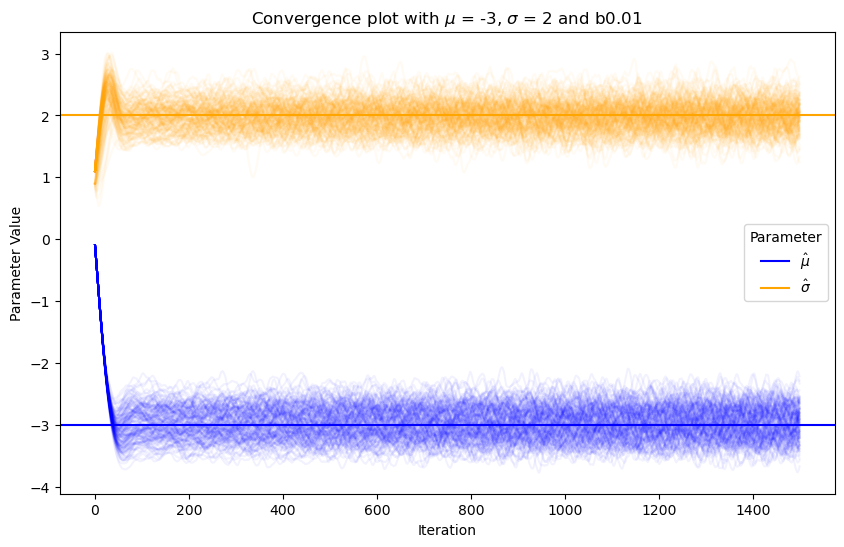

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

counter = 0
# Assuming param_combinations is already defined and df is your DataFrame
for mu, sigma, b, xsize, ysize in param_combinations:
    simulations_df = df[(df["mu"] == mu) & (df["sigma"] == sigma) 
                        & (df["b"] == b) & (df["xsize"] == xsize) 
                        & (df["ysize"] == ysize)]
    
    melted_df = simulations_df.melt(id_vars=["ID", "Iteration"],
                                    value_vars=["mu_hat", "sigma_hat"],
                                    var_name="param_type",
                                    value_name="param_value")

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Plot all lines for each ID
    for param_type, color in zip(["mu_hat", "sigma_hat"], ["blue", "orange"]):
        subset = melted_df[melted_df["param_type"] == param_type]
        sns.lineplot(data=subset, x='Iteration', y='param_value', units='ID', estimator=None, color=color, alpha=0.05)
    
    # Add horizontal reference lines for mu and sigma
    plt.axhline(y=mu, color="blue", linestyle='-', label=r'$\hat\mu$')
    plt.axhline(y=sigma, color="orange", linestyle='-', label=r'$\hat\sigma$')
    
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence plot with $\mu$ = {mu}, $\sigma$ = {sigma} and {b}")

    # Adjust the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Parameter')
    
    file_name = f"mu{mu}_sigma{sigma}_b{b}_xsize{xsize}_ysize{ysize}.png"
    plt.savefig(f"{saving_path_convergence}/{file_name}")
    plt.close()

    counter += 1
    if counter == 1:
	
    	break


# Violin chart for sample sizes

In [28]:
saving_path_sample_size_effect = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Violin_sample_size_effect"

In [29]:
# getting the individual parameter combination sub dataframes 

df_last_150_aggregated_index_reset = df_last_150_aggregated.reset_index()


# Get the unique combinations of the multi-index levels

param_combinations = df_last_150_aggregated_index_reset.groupby(["mu", "sigma", "b"]).groups.keys()
param_combinations

dict_keys([(-3, 2, 'b0.01'), (-3, 2, 'b0.1'), (-3, 2, 'bAUTO'), (-3, 40, 'b0.01'), (-3, 40, 'b0.1'), (-3, 40, 'bAUTO'), (50, 2, 'b0.01'), (50, 2, 'b0.1'), (50, 2, 'bAUTO'), (50, 40, 'b0.01'), (50, 40, 'b0.1'), (50, 40, 'bAUTO')])

### Y sample size effect

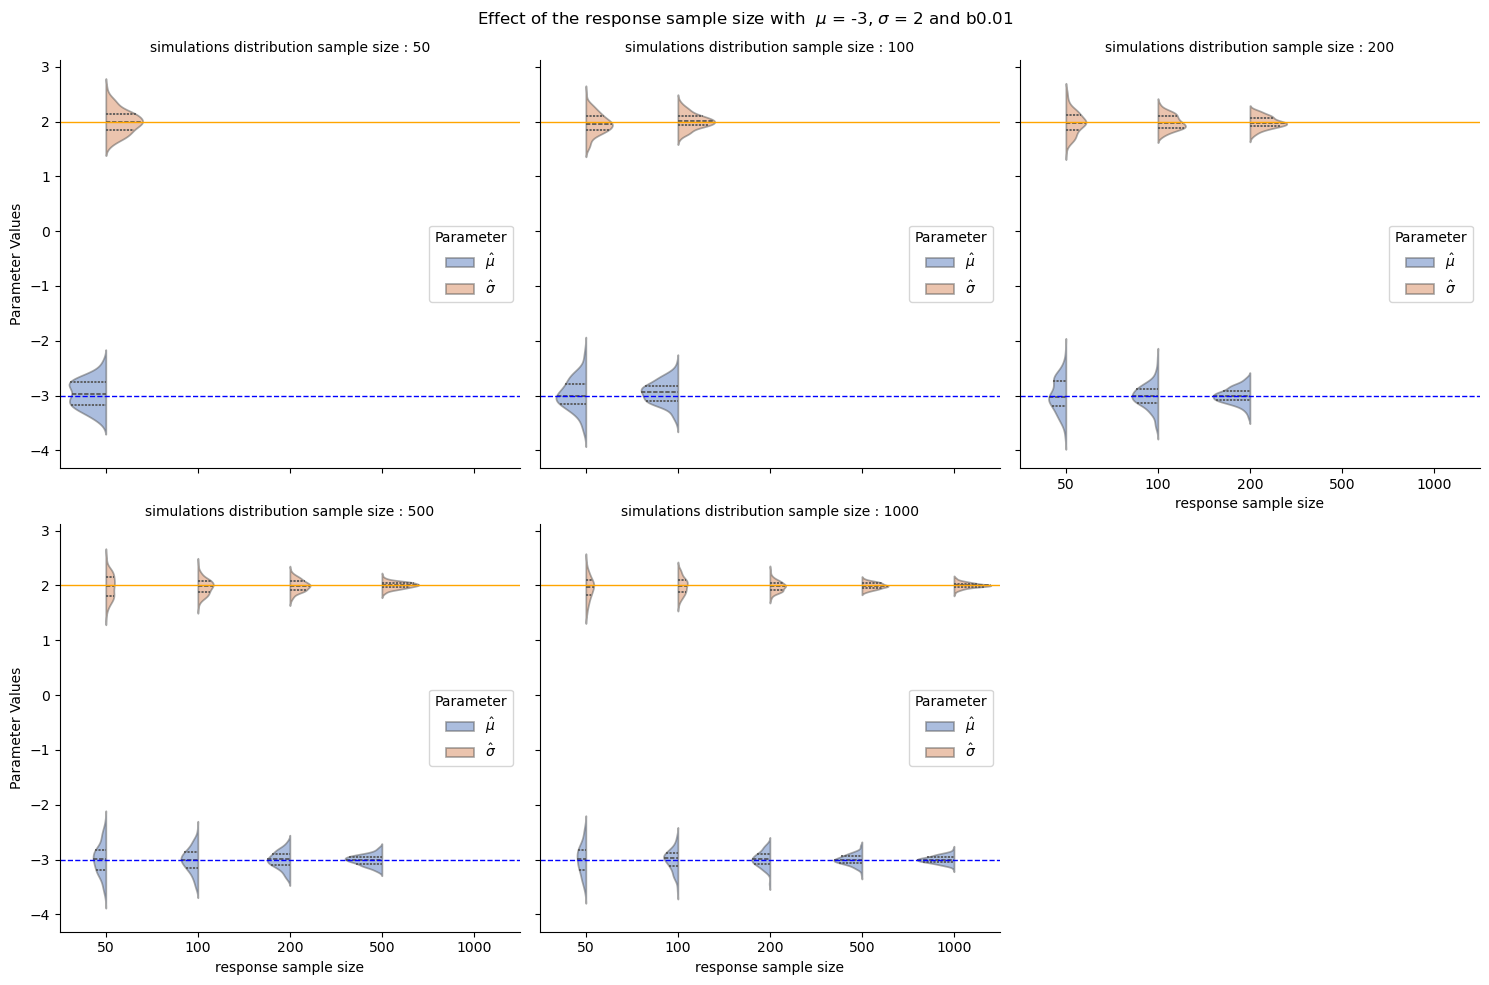

created and saved 1 figures


In [37]:
# go through the different simulation runs => 180
counter = 0
# Iterate through each combination of index levels
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	# Reset the multi-index and flatten the columns
	simulations_df = simulations_df.reset_index()
	simulations_df.columns = ['_'.join(filter(None, col)).strip() for col in simulations_df.columns.values]

	# Rename the columns for easier access
	simulations_df.rename(columns={
	'ysize_': 'ysize',
	'xsize_': 'xsize',
	'mu_hat_mean': 'mu_hat_mean',
	'sigma_hat_mean': 'sigma_hat_mean'
	}, inplace=True)

	# Melt the DataFrame to long format for easier plotting with seaborn
	df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
			var_name='Type', value_name='Mean')

	# Create a FacetGrid for separate violin plots by xsize
	g = sns.FacetGrid(df_long, col="xsize", col_wrap=3, sharey=True, height=5, aspect=1)

	# Map the violinplot to the FacetGrid
	g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)

	# Add horizontal lines to each subplot
	for ax in g.axes.flat:
		ax.axhline(y=simulations_df["mu"].iloc[0], color='blue', linestyle='--', linewidth=1)
		ax.axhline(y=simulations_df["sigma"].iloc[0], color='orange', linestyle='-', linewidth=1)

	# Get handles and labels from the first axis
	handles, labels = g.axes.flat[0].get_legend_handles_labels()

	# Replace old labels with LaTeX formatted ones

	
	new_labels = [r'$\hat{\mu}$' if label == 'mu_hat_mean' else r'$\hat{\sigma}$' for label in labels]

	# Manually add the new legend
	# Create a new legend with the handles and updated labels
	for ax in g.axes.flat:
		ax.legend(handles=handles, labels=new_labels, title='Parameter')

	# Set titles and axis labels
	g.set_axis_labels('response sample size', 'Parameter Values')
	g.set_titles(col_template='simulations distribution sample size : {col_name}')

	# Adjust the main title
	plt.subplots_adjust(top=0.93)

	mu_latex = r"$\mu$"
	sigma_latex = r"$\sigma$"
	g.figure.suptitle(f'Effect of the response sample size with  {mu_latex} = {mu}, {sigma_latex} = {sigma} and {b}')

	file_name = f"mu{mu}_sigma{sigma}_{b}_yeffect"

	#plt.savefig(f"{saving_path_sample_size_effect}\{file_name}.png")

	plt.show()
	plt.close()

	counter += 1

	print(f"created and saved {counter} figures")

	if counter == 1:
		break
	

	

### xsize Effect

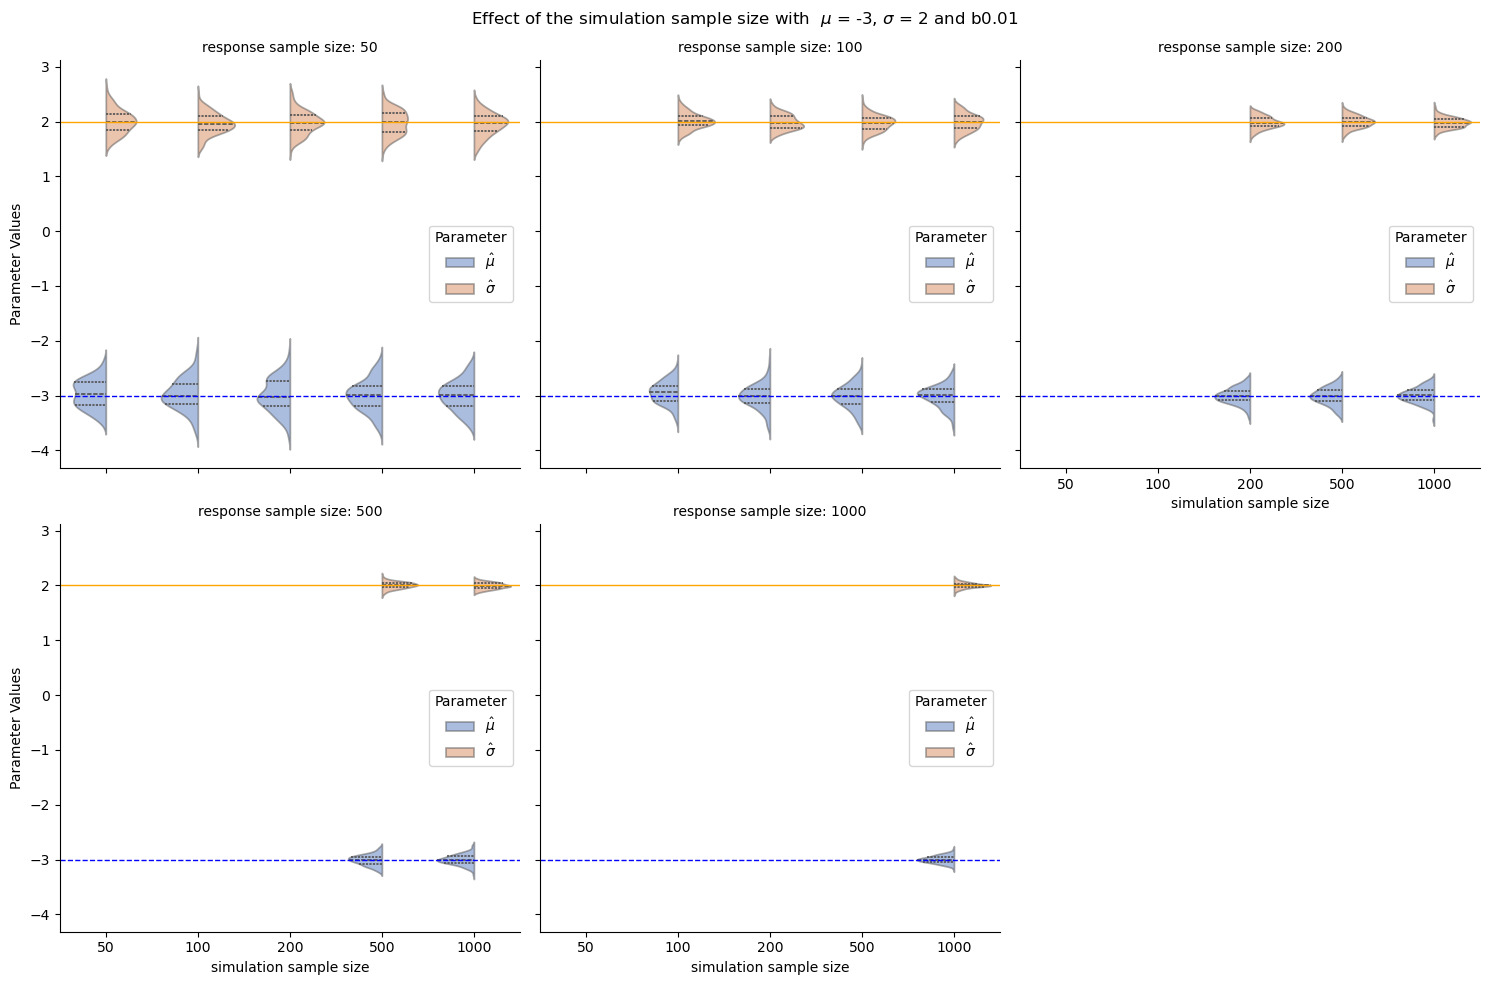

created and saved 1 figures


In [39]:
# go through the different simulation runs => 180
counter = 0
# Iterate through each combination of index levels
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	# Reset the multi-index and flatten the columns
	simulations_df = simulations_df.reset_index()
	simulations_df.columns = ['_'.join(filter(None, col)).strip() for col in simulations_df.columns.values]

	# Rename the columns for easier access
	simulations_df.rename(columns={
	'ysize_': 'ysize',
	'xsize_': 'xsize',
	'mu_hat_mean': 'mu_hat_mean',
	'sigma_hat_mean': 'sigma_hat_mean'
	}, inplace=True)

	# Melt the DataFrame to long format for easier plotting with seaborn
	df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
			var_name='Type', value_name='Mean')

	# Create a FacetGrid for separate violin plots by xsize
	g = sns.FacetGrid(df_long, col="ysize", col_wrap=3, sharey=True, height=5, aspect=1)

	# Map the violinplot to the FacetGrid
	g.map_dataframe(sns.violinplot, x='xsize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)

	# Add horizontal lines to each subplot
	for ax in g.axes.flat:
		ax.axhline(y=simulations_df["mu"].iloc[0], color='blue', linestyle='--', linewidth=1)
		ax.axhline(y=simulations_df["sigma"].iloc[0], color='orange', linestyle='-', linewidth=1)

	# Get handles and labels from the first axis
	handles, labels = g.axes.flat[0].get_legend_handles_labels()

	# Replace old labels with LaTeX formatted ones

	
	new_labels = [r'$\hat{\mu}$' if label == 'mu_hat_mean' else r'$\hat{\sigma}$' for label in labels]

	# Manually add the new legend
	# Create a new legend with the handles and updated labels
	for ax in g.axes.flat:
		ax.legend(handles=handles, labels=new_labels, title='Parameter')

	# Set titles and axis labels
	g.set_axis_labels('simulation sample size', 'Parameter Values')
	g.set_titles(col_template='response sample size: {col_name}')

	# Adjust the main title
	plt.subplots_adjust(top=0.93)

	mu_latex = r"$\mu$"
	sigma_latex = r"$\sigma$"
	g.figure.suptitle(f'Effect of the simulation sample size with  {mu_latex} = {mu}, {sigma_latex} = {sigma} and {b}')

	file_name = f"mu{mu}_sigma{sigma}_{b}_xeffect"

	#plt.savefig(f"{saving_path_sample_size_effect}\{file_name}.png")

	plt.show()
	plt.close()

	counter += 1

	print(f"created and saved {counter} figures")

	if counter == 1:
		break
	

	